In [1]:
! pip install python_speech_features

In [2]:
import os
from scipy.io import wavfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Conv2D, MaxPool2D, Flatten, LSTM
from keras.layers import Dropout, Dense, TimeDistributed
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
from tqdm import tqdm # enable us to see progress bar
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
from python_speech_features import mfcc, logfbank
import librosa

# 1-EDA

Visualization of following;

- 1-Time Series
- 2-Fourier Transforms
- 3-Filter Bank Coefficients
- 4-Mel Frequency Cepstrum Coefficients

In [4]:
def plot_signals(signals):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Time Series', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(signals.keys())[i])
            axes[x,y].plot(list(signals.values())[i])
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

def plot_fft(fft):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Fourier Transforms', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            data = list(fft.values())[i]
            Y, freq = data[0], data[1]
            axes[x,y].set_title(list(fft.keys())[i])
            axes[x,y].plot(freq, Y)
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

def plot_fbank(fbank):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Filter Bank Coefficients', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(fbank.keys())[i])
            axes[x,y].imshow(list(fbank.values())[i],
                    cmap='hot', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

def plot_mfccs(mfccs):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Mel Frequency Cepstrum Coefficients', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(mfccs.keys())[i])
            axes[x,y].imshow(list(mfccs.values())[i],
                    cmap='hot', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1
def calc_fft(y,rate):
    n=len(y)
    freq=np.fft.rfftfreq(n,d=1/rate) # magnitude
    Y=abs(np.fft.rfft(y)/n) # to scale magnitude 
    return (Y,freq) # returns mag and freq

In [5]:
df = pd.read_csv('instruments.csv')

In [6]:
df.head()

,fname,label
0,5388d14d.wav,Saxophone
1,c685f05f.wav,Saxophone
2,36d20ab5.wav,Saxophone
3,d6665734.wav,Saxophone
4,7352e28f.wav,Saxophone


In [7]:
df.set_index('fname', inplace=True)

In [8]:
df.head()

,label
fname,
5388d14d.wav,Saxophone
c685f05f.wav,Saxophone
36d20ab5.wav,Saxophone
d6665734.wav,Saxophone
7352e28f.wav,Saxophone


In [9]:
df.shape

(300, 1)

In [10]:
# What's length in second

In [11]:
for f in df.index:
    rate, signal = wavfile.read('wavfiles/'+f)
    # For positional based index
    df.at[f, 'length'] = signal.shape[0]/rate # creating new value length

In [12]:
df.head()

,label,length
fname,,
5388d14d.wav,Saxophone,4.14
c685f05f.wav,Saxophone,1.54
36d20ab5.wav,Saxophone,4.90
d6665734.wav,Saxophone,10.50
7352e28f.wav,Saxophone,6.24


### Class Distribution

In [13]:
classes = list(np.unique(df.label))

In [14]:
classes

['Acoustic_guitar',
 'Bass_drum',
 'Cello',
 'Clarinet',
 'Double_bass',
 'Flute',
 'Hi-hat',
 'Saxophone',
 'Snare_drum',
 'Violin_or_fiddle']

In [15]:
df.label.value_counts()

Bass_drum           30
Clarinet            30
Acoustic_guitar     30
Cello               30
Snare_drum          30
Flute               30
Saxophone           30
Violin_or_fiddle    30
Hi-hat              30
Double_bass         30
Name: label, dtype: int64

This only shows how many values a class has. It does not give any useful information

### Class distribution as per length

In [16]:
class_dist = df.groupby(['label'])['length'].mean()

In [17]:
class_dist

label
Acoustic_guitar     6.948667
Bass_drum           1.937333
Cello               5.000667
Clarinet            6.596000
Double_bass         3.206000
Flute               8.054667
Hi-hat              3.357333
Saxophone           7.124000
Snare_drum          3.987333
Violin_or_fiddle    4.530000
Name: length, dtype: float64

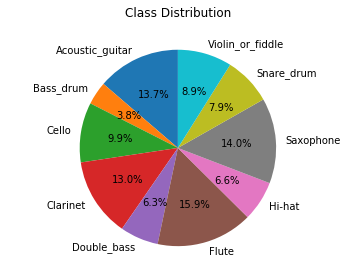

In [18]:
fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08)
ax.pie(class_dist, labels=class_dist.index, autopct='%1.1f%%',
       shadow=False, startangle=90)
ax.axis('equal') # to make circle shape
plt.show()

### Visualize time series and FFT

In [23]:
df = pd.read_csv('instruments.csv')

In [24]:
df.head()

,fname,label
0,5388d14d.wav,Saxophone
1,c685f05f.wav,Saxophone
2,36d20ab5.wav,Saxophone
3,d6665734.wav,Saxophone
4,7352e28f.wav,Saxophone


In [20]:
signals={}
fft={}
fbank={}
mfccs={}

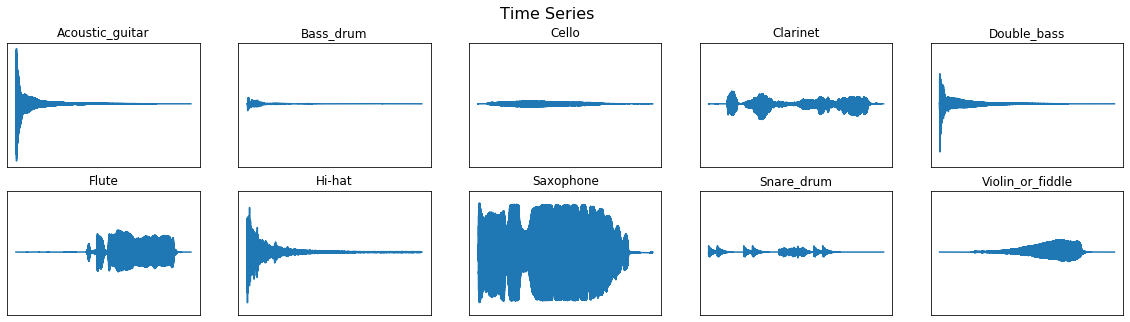

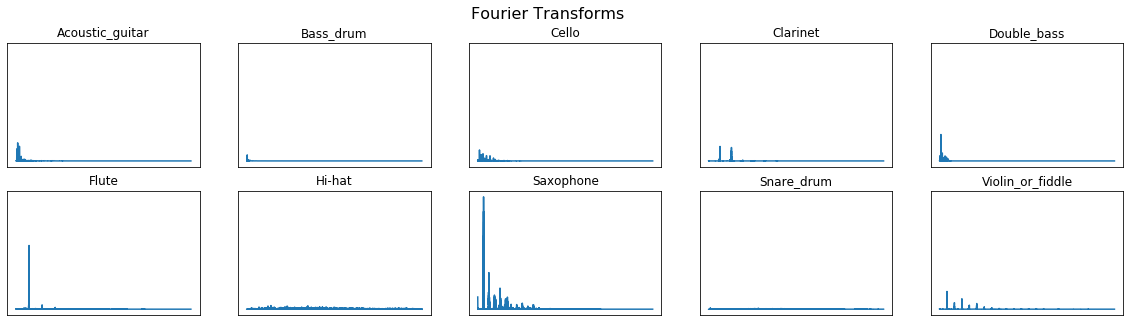

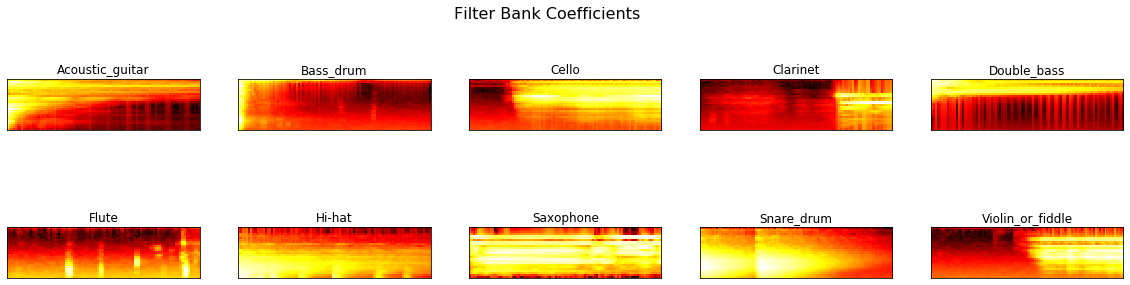

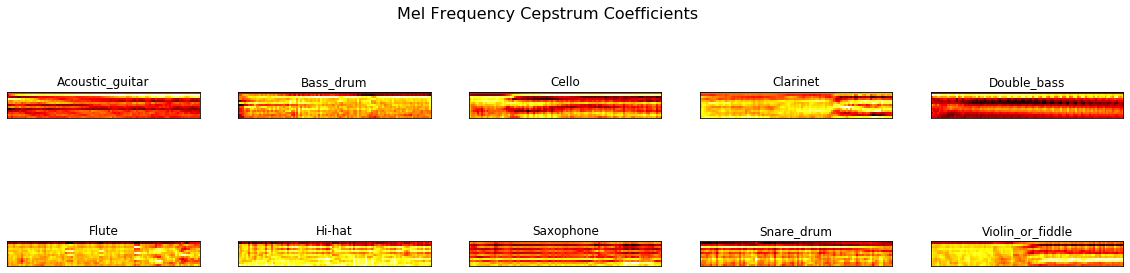

In [28]:
# checking our 1st wav file instead of going through all of them
for c in classes:
    wav_file=df[df.label == c].iloc[0,0]
    signal,rate=librosa.load('wavfiles/'+wav_file, sr=44100) # sr=Sampling rate
    signals[c]=signal
    fft[c]=calc_fft(signal, rate)
    #from python_speech_features import logfbank
    bank=logfbank(signal[:rate] , rate, nfilt= 26, nfft=1103).T # to see 1 second of data
    # nfft= sr/40 ......44100/40 to get milisec of window length
    fbank[c]=bank
    mel=mfcc(signal[:rate], rate, numcep=13, nfilt=26,nfft=1103).T
    # numcep is half of win legth from fft
    mfccs[c]=mel
    
plot_signals(signals)
plt.show()

plot_fft(fft)
plt.show()

plot_fbank(fbank)
plt.show

plot_mfccs(mfccs)
plt.show()


- In 1st figure of time series, we can see that "Flute" has some blank spaces. Same goes with Hi-hat where there is no signal. We need to make "Noise Filter Detection" i.e what is the lowest theoratical value that a micro-phone can read.In short, we will get rid of dead space like missing values in our normal data.



### cleaning dead space

In [31]:
def envelop(y,rate, threshold):
    mask=[]
    y=pd.Series(y).apply(np.abs) #make negative part of signal as positive through absolute value
    y_mean= y.rolling(window=int(rate/10),min_periods=1,center= True).mean()
    for mean in y_mean:
        if mean > threshold :
            mask.append(True)
        else:
            mask.append(False)
    return mask

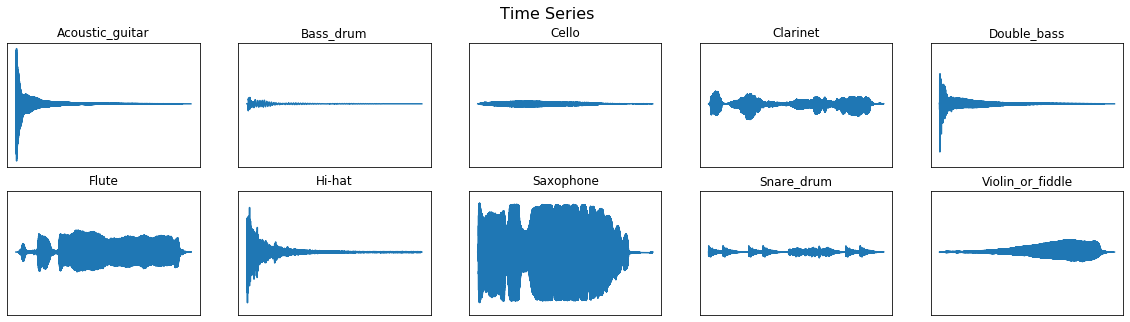

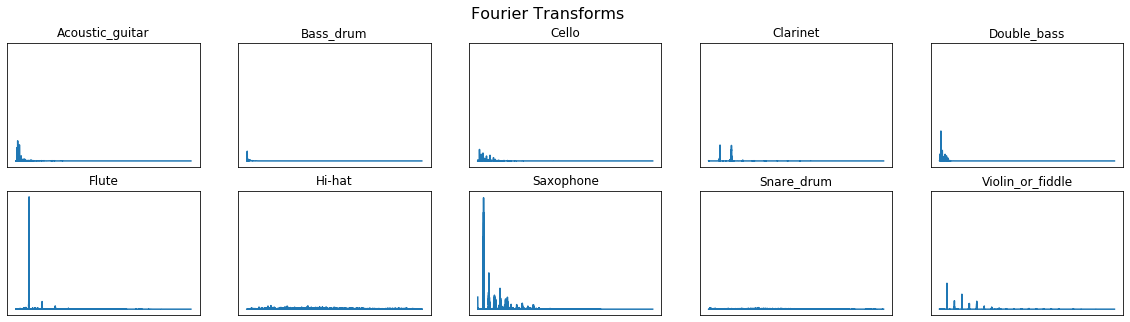

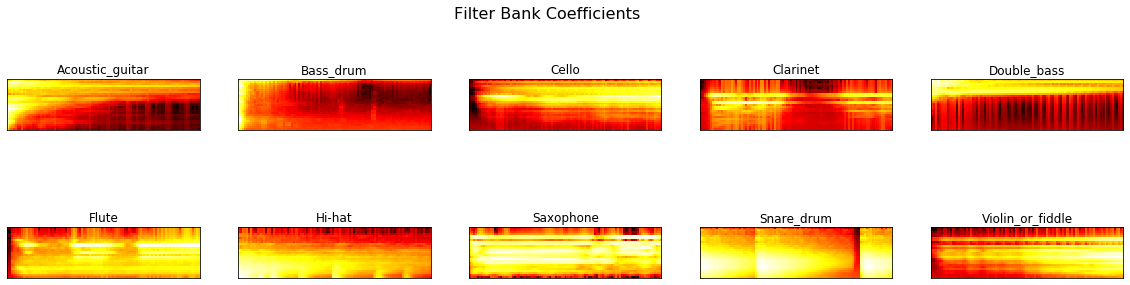

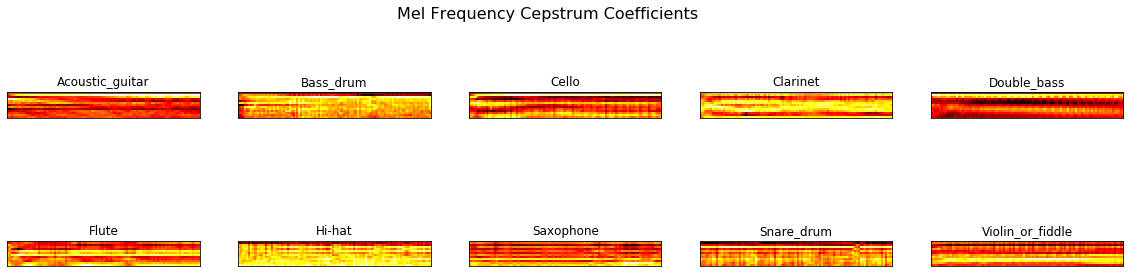

In [32]:
for c in classes:
    wav_file=df[df.label == c].iloc[0,0]
    signal,rate=librosa.load('wavfiles/'+wav_file, sr=44100) # sr=Sampling rate
    # apply envelop function
    mask= envelop(signal, rate, 0.0005) # threshold = 0.0005
    signal=signal[mask]
    
    signals[c]=signal
    fft[c]=calc_fft(signal, rate)
    #from python_speech_features import logfbank
    bank=logfbank(signal[:rate] , rate, nfilt= 26, nfft=1103).T # to see 1 second of data
    # nfft= sr/40 ......44100/40 to get milisec of window length
    fbank[c]=bank
    mel=mfcc(signal[:rate], rate, numcep=13, nfilt=26,nfft=1103).T
    # numcep is half of win legth from fft
    mfccs[c]=mel
    
plot_signals(signals)
plt.show()

plot_fft(fft)
plt.show()

plot_fbank(fbank)
plt.show

plot_mfccs(mfccs)
plt.show()


See how "flute" has changed. Dead spaces are gone

### Down-sampling

If we do not have much of meat in our data  then we down sample to get more compac data

In [33]:
if len(os.listdir('clean')) == 0:
    for f in tqdm(df.fname):
        signal,rate=librosa.load('wavfiles/'+f, sr=16000)
        mask= envelop(signal, rate, 0.0005)
        wavfile.write(filename='clean/' +f, rate=rate, data=signal[mask])

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [01:05<00:00,  5.31it/s]


tqdm enable us to see progress bar

As we have our wav files cleaned so we are ready for modeling 